# Pandas

Sadly,

> 80% of data analysis is spent on the process of cleaning and preparing the data (Dasu&Johnson, 2003)

![](https://www.telegraph.co.uk/content/dam/news/2016/08/23/106598324PandawaveNEWS_trans_NvBQzQNjv4Bqeo_i_u9APj8RuoebjoAHt0k9u7HhRJvuo-ZLenGRumA.jpg?imwidth=450)

Pandas comes with 3 main classes:

* `Series` - wrapper around a numpy vector, represents columns(variables) in a DataFrame
* `Index` - similar to Series, used to store row/column labels
* `DataFrame` - sequence or dict of Series objects of indentical lenghts

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
np.random.seed(123)
x = pd.DataFrame({
    "A": np.random.rand(5),
    "B": [True, False, True, None, True],
    "C": ["f", None, "m", "f", "f"]
})

In [3]:
x

,A,B,C
0,0.696469,True,f
1,0.286139,False,None
2,0.226851,True,m
3,0.551315,None,f
4,0.719469,True,f


In [4]:
type(x)

pandas.core.frame.DataFrame

In [5]:
p = [
    ("A", np.random.rand(5)),
    ("B", [True, False, True, None, True]),
    ("C", ["f", None, "m", "f", "f"])   
]
pd.DataFrame(p)

,0,1
0,A,"[0.42310646012446096, 0.9807641983846155, 0.68..."
1,B,"[True, False, True, None, True]"
2,C,"[f, None, m, f, f]"


In [7]:
pd.DataFrame.from_dict(dict(p)) # pd.DataFrame.from_items(p)

,A,B,C
0,0.423106,True,f
1,0.980764,False,None
2,0.684830,True,m
3,0.480932,None,f
4,0.392118,True,f


In [8]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv", comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv", comment="#")

In [9]:
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [10]:
birth_dates.head(3)

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958


In [11]:
birth_dates.tail()

,Name,BirthDate
127,Theodor Waxman,15.05.1931
128,Romualdo Marin,04.09.1982
129,Felicita Wilbur,07.06.1982
130,Kaminaga Ichibei,28.03.1996
131,Vania Toler,28.02.2000


In [12]:
birth_dates.shape

(132, 2)

In [13]:
birth_dates.dtypes

Name         object
BirthDate    object
dtype: object

In [14]:
birth_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
Name         132 non-null object
BirthDate    132 non-null object
dtypes: object(2)
memory usage: 2.1+ KB


# Series

In [15]:
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [16]:
x

,A,B,C
0,0.696469,True,f
1,0.286139,False,None
2,0.226851,True,m
3,0.551315,None,f
4,0.719469,True,f


In [17]:
x.loc[:,"A"]

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [18]:
x["A"]

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [19]:
x.get("A")

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [20]:
x.A

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64

In [22]:
type(x.A)

pandas.core.series.Series

In [23]:
y = x.A

In [24]:
y.name

'A'

In [26]:
y.name = "AAAAAAAArghhhh!!!"

In [27]:
y

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: AAAAAAAArghhhh!!!, dtype: float64

In [28]:
pd.DataFrame(y)

,AAAAAAAArghhhh!!!
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469


In [30]:
pd.DataFrame(y.rename("Ni!"))

,Ni!
0,0.696469
1,0.286139
2,0.226851
3,0.551315
4,0.719469


In [31]:
y.dtype

dtype('float64')

In [32]:
y.values

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [33]:
np.sum(y.values)

2.4802437129808985

In [34]:
np.sum(y)

2.4802437129808985

In [37]:
# data-time data:
pd.Series(pd.date_range("2019-01-31", periods=3, freq="D"))

0   2019-01-31
1   2019-02-01
2   2019-02-02
dtype: datetime64[ns]

In [38]:
pd.Series(pd.date_range("2019-01-31", periods=3, freq="3M"))

0   2019-01-31
1   2019-04-30
2   2019-07-31
dtype: datetime64[ns]

In [40]:
# number of ns since the UNIX epoch (January 1, 1970 0:00 GMT)
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


In [45]:
#birth_dates["BirthDate2"] = parse_string_to_date_time(birth_dates["BirthDate"])
birth_dates["BirthDate2"] = pd.to_datetime(birth_dates["BirthDate"], dayfirst=True)#, format="%d.%m.%Y")

In [46]:
birth_dates.head()

,Name,BirthDate,BirthDate2
0,Hung Hyun-Seok,12.06.2000,2000-06-12
1,Benno Blumenthal,31.12.1918,1918-12-31
2,Paitoon Ornwimol,26.06.1958,1958-06-26
3,P'yon Yong-Sun,10.07.1947,1947-07-10
4,Étienne Chaney,04.09.1983,1983-09-04


In [47]:
# categorical

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
tips.day.head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: object

In [53]:
# missing data:
# ["a string", "another string", None, "yet another"]
pd.Series([1, np.nan, 3.13, np.nan])

0    1.00
1     NaN
2    3.13
3     NaN
dtype: float64

In [54]:
np.unique(tips.day)

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [56]:
day_cat = pd.Series(pd.Categorical(tips["day"]))

In [61]:
day_cat.sample(5, random_state=123)

112    Sun
19     Sat
187    Sun
169    Sat
31     Sat
dtype: category
Categories (4, object): [Fri, Sat, Sun, Thur]

In [59]:
day_cat.cat.categories

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')

In [62]:
day_cat.cat.codes.sample(5, random_state=123)

112    2
19     1
187    2
169    1
31     1
dtype: int8

In [66]:
tips.sex.astype("category").head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): [Female, Male]

In [68]:
day_cat.cat.categories = ["Friday", "Saturday", "Sunday", "Thursday"]
day_cat.sample(5, random_state=123)

112      Sunday
19     Saturday
187      Sunday
169    Saturday
31     Saturday
dtype: category
Categories (4, object): [Friday, Saturday, Sunday, Thursday]

In [69]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
iris["Species"] = iris["Species"].astype("category")

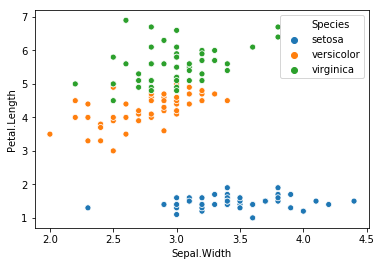

In [74]:
sns.scatterplot(data=iris, x="Sepal.Width", y="Petal.Length", hue="Species",)
plt.show()

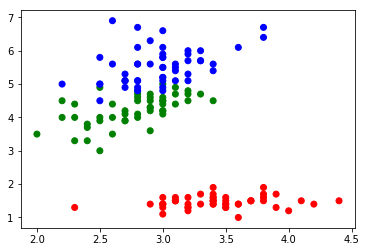

In [76]:
plt.scatter(iris["Sepal.Width"], iris["Petal.Length"], c=np.array(["red", "green", "blue"])[iris.Species.cat.codes])

In [79]:
# ordered categorical
y = pd.Series(pd.Categorical(["s", "l", "m", "s", "s", "l", "l", "m", "xl", "xs"]))

In [80]:
y

0     s
1     l
2     m
3     s
4     s
5     l
6     l
7     m
8    xl
9    xs
dtype: category
Categories (5, object): [l, m, s, xl, xs]

In [82]:
y.sort_values()

1     l
5     l
6     l
2     m
7     m
0     s
3     s
4     s
8    xl
9    xs
dtype: category
Categories (5, object): [l, m, s, xl, xs]

In [84]:
y = pd.Series(pd.Categorical(["s", "l", "m", "s", "s", "l", "l", "m", "xl", "xs"],
                            ordered=True,
                            categories=["xs", "s", "m", "l", "xl"]))
y.sort_values()

9    xs
0     s
3     s
4     s
2     m
7     m
1     l
5     l
6     l
8    xl
dtype: category
Categories (5, object): [xs < s < m < l < xl]

In [86]:
y[y>="m"]

1     l
2     m
5     l
6     l
7     m
8    xl
dtype: category
Categories (5, object): [xs < s < m < l < xl]

In [87]:
#sample, head, ...
tips.head() # DataFrame.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [88]:
tips.sex.head() # Series.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object

# Indexes

In [89]:
x = tips.head().copy()
x

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
# every dataframe has 2 indexes
# every series has 1 index

In [91]:
x.tip.index

RangeIndex(start=0, stop=5, step=1)

In [92]:
x.tip

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [93]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [94]:
x.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [95]:
x.index = pd.Index(["John", "Mary", "John", "Thomas", "Tobias"])

In [96]:
x

,total_bill,tip,sex,smoker,day,time,size
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
John,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
Tobias,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
x.tip

John      1.01
Mary      1.66
John      3.50
Thomas    3.31
Tobias    3.61
Name: tip, dtype: float64

In [100]:
x.rename({"total_bill":"bill"}, axis=1) #inplace=False by default

,bill,tip,sex,smoker,day,time,size
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
John,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
Tobias,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
# indexes may have .name (s)

In [103]:
x.index.name="NAME"
x.columns.name="FEATURE"
x

FEATURE,total_bill,tip,sex,smoker,day,time,size
NAME,,,,,,,
John,16.99,1.01,Female,No,Sun,Dinner,2
Mary,10.34,1.66,Male,No,Sun,Dinner,3
John,21.01,3.50,Male,No,Sun,Dinner,3
Thomas,23.68,3.31,Male,No,Sun,Dinner,2
Tobias,24.59,3.61,Female,No,Sun,Dinner,4


In [105]:
x.tip

NAME
John      1.01
Mary      1.66
John      3.50
Thomas    3.31
Tobias    3.61
Name: tip, dtype: float64

In [106]:
x.reset_index()

FEATURE,NAME,total_bill,tip,sex,smoker,day,time,size
0,John,16.99,1.01,Female,No,Sun,Dinner,2
1,Mary,10.34,1.66,Male,No,Sun,Dinner,3
2,John,21.01,3.50,Male,No,Sun,Dinner,3
3,Thomas,23.68,3.31,Male,No,Sun,Dinner,2
4,Tobias,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
x.reset_index(drop=True)

FEATURE,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
birth_dates.head().set_index("Name")

,BirthDate,BirthDate2
Name,,
Hung Hyun-Seok,12.06.2000,2000-06-12
Benno Blumenthal,31.12.1918,1918-12-31
Paitoon Ornwimol,26.06.1958,1958-06-26
P'yon Yong-Sun,10.07.1947,1947-07-10
Étienne Chaney,04.09.1983,1983-09-04


In [114]:
x.sort_values(["sex", "size"]).set_index(["sex", "size"])

FEATURE      total_bill   tip smoker  day    time
sex    size                                      
Female 2          16.99  1.01     No  Sun  Dinner
       4          24.59  3.61     No  Sun  Dinner
Male   2          23.68  3.31     No  Sun  Dinner
       3          10.34  1.66     No  Sun  Dinner
       3          21.01  3.50     No  Sun  Dinner

In [115]:
x.sort_values(["sex", "size"]).set_index(["sex", "size"]).tip

sex     size
Female  2       1.01
        4       3.61
Male    2       3.31
        3       1.66
        3       3.50
Name: tip, dtype: float64

In [118]:
tips.groupby(["sex", "day"]).tip.mean()

sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Male    Fri     2.693000
        Sat     3.083898
        Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

In [119]:
tips.groupby(["sex", "day"]).tip.mean().reset_index()

,sex,day,tip
0,Female,Fri,2.781111
1,Female,Sat,2.801786
2,Female,Sun,3.367222
3,Female,Thur,2.575625
4,Male,Fri,2.693000
5,Male,Sat,3.083898
6,Male,Sun,3.220345
7,Male,Thur,2.980333


In [120]:
tips.groupby(["sex", "day"]).mean()

total_bill       tip      size
sex    day                                 
Female Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444
       Thur   16.715312  2.575625  2.468750
Male   Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
       Thur   18.714667  2.980333  2.433333

In [123]:
tips.groupby(["sex", "day"]).tip.mean().unstack()

day,Fri,Sat,Sun,Thur
sex,,,,
Female,2.781111,2.801786,3.367222,2.575625
Male,2.693000,3.083898,3.220345,2.980333


In [126]:
s = birth_dates.set_index(["BirthDate2"])
s.head()

,Name,BirthDate
BirthDate2,,
2000-06-12,Hung Hyun-Seok,12.06.2000
1918-12-31,Benno Blumenthal,31.12.1918
1958-06-26,Paitoon Ornwimol,26.06.1958
1947-07-10,P'yon Yong-Sun,10.07.1947
1983-09-04,Étienne Chaney,04.09.1983


In [127]:
s.loc["2020-01-01":, :]

,Name,BirthDate
BirthDate2,,
2023-02-07,Lachina Gerald,07.02.2023
2028-02-18,Svetislav Bojanić,18.02.2028
2028-08-28,Jean-Guy Baudet,28.08.2028
2024-06-26,Vidak Krkobabić,26.06.2024
2021-06-22,Halász Barnabás,22.06.2021
2020-04-14,Guelfo Patalano,14.04.2020
2029-01-06,Mateusz Melánia,06.01.2029


In [128]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [130]:
#....datetime.... " January 1949 -> 1949-01-01 or 1949-01-31....
flights["date"] = \
    pd.to_datetime(flights["year"].astype("str")+"."+flights["month"].astype("str")+".01", yearfirst=True)
flights.head()

,year,month,passengers,date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


In [131]:
(flights["year"].astype("str")+"."+flights["month"].astype("str")+".01").head()

0     1949.January.01
1    1949.February.01
2       1949.March.01
3       1949.April.01
4         1949.May.01
dtype: object

In [136]:
# pd.to_datetime(dict(year=flights.year,
#                     month=flights.month,
#                     day=1
#                    )).head()

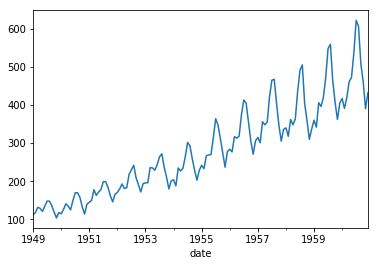

In [139]:
flights.set_index("date").passengers.plot()

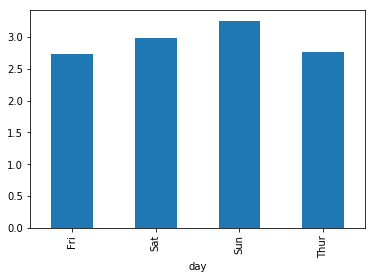

In [142]:
tips.groupby("day").tip.mean().plot(kind="bar")

# Indexing Series

In [143]:
np.random.seed(123)
b = np.round(np.random.uniform(0,1,10),2)
b

array([0.7 , 0.29, 0.23, 0.55, 0.72, 0.42, 0.98, 0.68, 0.48, 0.39])

In [144]:
# indexing numpy vector
# b[0]
# b[:5]
# b[ [0,1,2] ]
# b[ b>0.5 ]

In [145]:
b = pd.Series(b)
c = b.copy()
b.index = np.random.permutation(np.r_[0:10])
c.index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

In [147]:
c

a    0.70
b    0.29
c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
h    0.68
i    0.48
j    0.39
dtype: float64

In [148]:
b

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64

In [149]:
# NEVER APPLY [] ON SERIES DIRECTLY

In [150]:
b[0:1]

2    0.7
dtype: float64

In [151]:
b[0]

0.39

In [152]:
b[ [0] ]

0    0.39
dtype: float64

In [153]:
# .iloc[] -- position-based indexing (physical index)
# .loc[]  -- label-based indexing (.index index)

In [154]:
b.loc[0]

0.39

In [155]:
b.iloc[0]

0.7

In [156]:
b.iloc[1:7]

1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
dtype: float64

In [157]:
b.loc[1:7]

1    0.29
8    0.23
7    0.55
dtype: float64

In [158]:
c.loc["d":"f"]

d    0.55
e    0.72
f    0.42
dtype: float64

In [159]:
c.loc[ c> 0.7]

e    0.72
g    0.98
dtype: float64

In [160]:
c.loc[ ["a", "d"] ]

a    0.70
d    0.55
dtype: float64

In [161]:
c.iloc[ c> 0.7] # boolean Series

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [162]:
c.iloc[ c.values> 0.7] # boolean ndarray

e    0.72
g    0.98
dtype: float64

In [165]:
b.reset_index(drop=True)[ [0, 4, 2] ]

0    0.70
4    0.72
2    0.23
dtype: float64

In [167]:
iris.Species.sample(5)

136     virginica
31         setosa
83     versicolor
71     versicolor
74     versicolor
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [174]:
iris.Species[iris["Sepal.Length"]>7.2]

105    virginica
107    virginica
117    virginica
118    virginica
122    virginica
130    virginica
131    virginica
135    virginica
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [175]:
x = tips.groupby(["sex", "day"]).tip.mean()
x

sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Male    Fri     2.693000
        Sat     3.083898
        Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

In [179]:
x.loc["Female",:]

sex     day 
Female  Fri     2.781111
        Sat     2.801786
        Sun     3.367222
        Thur    2.575625
Name: tip, dtype: float64

In [178]:
x.loc[:,"Sun"]

sex
Female    3.367222
Male      3.220345
Name: tip, dtype: float64

In [181]:
x.loc[:,["Sun","Thur"]]

sex     day 
Female  Sun     3.367222
        Thur    2.575625
Male    Sun     3.220345
        Thur    2.980333
Name: tip, dtype: float64

# Indexing DataFrames

In [184]:
tips.loc[tips.tip>8,"tip":"day"]

,tip,sex,smoker,day
170,10.0,Male,Yes,Sat
212,9.0,Male,No,Sat


In [185]:
tips.loc[tips.tip>8,:]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


In [186]:
tips.loc[tips.tip>8,:].iloc[:,0:4]

,total_bill,tip,sex,smoker
170,50.81,10.0,Male,Yes
212,48.33,9.0,Male,No


In [187]:
tips.iloc[:5,:].loc[:,"day"]

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: object

In [188]:
tips.iloc[:5,:].loc[:,"day"].to_frame()

,day
0,Sun
1,Sun
2,Sun
3,Sun
4,Sun


In [189]:
tips.iloc[:5,:].loc[:,["day"]]

,day
0,Sun
1,Sun
2,Sun
3,Sun
4,Sun


1. In `tips`, select data on male customers where total bill was in $[10,20]$.

In [204]:
tips.loc[(tips.total_bill>=10) & (tips.total_bill<=20) & (tips.sex=="Male"),:].head()
tips.loc[(tips.total_bill.between(10,20)) & (tips.sex=="Male"),:].head()
tips.query(' 10 <= total_bill <= 20 and sex == "Male"  ').head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2


2. In `tips`, select data from Saturday and Sunday with tip $>\$5$.

In [209]:
tips.loc[ ((tips.day == "Sat") | (tips.day=="Sun")) & (tips.tip > 5)  ,:].head(1)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4


In [211]:
tips.loc[ (tips.day.isin(["Sat","Sun"])) & (tips.tip > 5)  ,:].head(1)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4


In [213]:
tips.query(' day in ["Sat", "Sun"] and tip > 5 ').head(1)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4


3. partition `tips`: create 2 dfs: `tips_train` (80%) and tips_test (20% rows)

In [221]:
tips2 = tips.sample(frac=1.0, random_state=123)
hwmny = round(tips2.shape[0]*0.8)

#tips_train = tips2.head(hwmny)
#tips_test  = tips2.tail(tips2.shape[0]-hwmny)

#tips_train = tips2.iloc[:hwmny,:]
#tips_test  = tips2.iloc[hwmny:,:]

tips_train = tips.sample(frac=0.8)
#tips_test = tips.loc[~tips.index.isin(tips_train.index), :]
tips_test = tips.loc[tips.index.difference(tips_train.index),:]

In [224]:
idx = np.random.permutation(np.arange(tips.shape[0]))
tips_train = tips.iloc[idx[:hwmny],:]
tips_test  = tips.iloc[idx[hwmny:],:]

In [222]:
assert tips_train.shape[0] + tips_test.shape[0] == tips.shape[0]

4. in `tips`, select all columns but `sex`,`smoker`, and `day` without referring to other columns' names explicitly

In [225]:
tips.loc[:,tips.columns.difference(["sex","smoker","day"])].head(1)

,size,time,tip,total_bill
0,2,Dinner,1.01,16.99


In [226]:
tips.loc[:,~tips.columns.isin(["sex","smoker","day"])].head(1)

,total_bill,tip,time,size
0,16.99,1.01,Dinner,2


In [227]:
tips.columns.difference(["sex","smoker","day"])

Index(['size', 'time', 'tip', 'total_bill'], dtype='object')

# Ops on Series and DataFrames

In [228]:
x = tips.sample(5, random_state=123)
y = x["total_bill"]
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [231]:
y.values * y.values

array([1449.3249,  426.4225,  927.8116,  112.9969,  336.7225])

In [232]:
y * y

112    1449.3249
19      426.4225
187     927.8116
169     112.9969
31      336.7225
Name: total_bill, dtype: float64

In [234]:
z = y.sample(frac=1.0)
z * y

19      426.4225
31      336.7225
112    1449.3249
169     112.9969
187     927.8116
Name: total_bill, dtype: float64

In [235]:
z

187    30.46
31     18.35
112    38.07
169    10.63
19     20.65
Name: total_bill, dtype: float64

In [236]:
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [237]:
# label wise!!!!

In [239]:
y.iloc[2:]

187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [240]:
y.iloc[:-1]

112    38.07
19     20.65
187    30.46
169    10.63
Name: total_bill, dtype: float64

In [241]:
y.iloc[2:]* y.iloc[:-1]

19          NaN
31          NaN
112         NaN
169    112.9969
187    927.8116
Name: total_bill, dtype: float64

In [245]:
z = pd.Series([1, 10, 100], index=[187, 187, 31])
z

187      1
187     10
31     100
dtype: int64

In [248]:
y.iloc[ [2, 3, 2, 4, 2] ]

187    30.46
169    10.63
187    30.46
31     18.35
187    30.46
Name: total_bill, dtype: float64

In [249]:
y.iloc[ [2, 3, 2, 4, 2] ] * z

31     1835.00
169        NaN
187      30.46
187     304.60
187      30.46
187     304.60
187      30.46
187     304.60
dtype: float64

In [247]:
# like FULL OUTER JOIN in SQL (by labels)

In [250]:
vehicles = pd.read_csv('http://www.gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz',
                      comment='#')

Given `fueleconomy::vehicles`, convert the values in
`cty` (city-) and `hwy` (highway-fuel economy -- given in mpg)
to l/100 km. Then add  new columns `z_cty` and `z_hwy`,
that give z-scores of `cty` and `hwy` (i.e., standardize these columns).
Moreover, add  two other columns `z_cty_rel` and `z_hwy_rel`, which denote the
corresponding z-scores relative to (grouped by) `class`.

In [251]:
vehicles.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,17,16


In [254]:
#vehicles["class"].drop_duplicates()

In [260]:
vehicles["cty2"] = 235/vehicles['cty']
#vehicles["z_cty2"] = (vehicles["cty2"]-np.mean(vehicles["cty2"]))/np.std(vehicles["cty2"], ddof=1)
vehicles["z_cty2"] = (vehicles["cty2"]-vehicles["cty2"].mean())/vehicles["cty2"].std()
vehicles["z_cty_rel"] = \
    vehicles.groupby("class").cty2.transform(lambda x: (x-x.mean())/x.std()) # or apply()

In [261]:
vehicles.sample(5, random_state=123)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,cty2,z_cty2,z_cty_rel
15081,25581,GMC,Sierra C15 2WD,2009,Standard Pickup Trucks 2WD,Automatic 6-spd,Rear-Wheel Drive,8.0,6.0,Regular,19,14,16.785714,0.664171,0.151462
19808,16038,Lexus,RX 300,2000,Midsize Station Wagons,Automatic 4-spd,Front-Wheel Drive,6.0,3.0,Regular,22,17,13.823529,-0.153326,0.271826
4915,6394,Chevrolet,Corvette,1990,Two Seaters,Automatic 4-spd,Rear-Wheel Drive,8.0,5.7,Premium,22,15,15.666667,0.355339,0.063639
31466,28340,Toyota,Truck 2WD,1984,Standard Pickup Trucks 2WD,Manual 5-spd,2-Wheel Drive,4.0,2.4,Diesel,28,26,9.038462,-1.473898,-2.636996
26707,21243,Pontiac,Montana SVX FWD,2005,Minivan - 2WD,Automatic 4-spd,Front-Wheel Drive,6.0,3.5,Regular,23,16,14.687500,0.085111,0.327045


In [262]:
cty2_means_per_class = vehicles.groupby("class").cty2.mean()
cty2_means_per_class.head()

class
Compact Cars                    12.123520
Large Cars                      15.279013
Midsize Cars                    13.503300
Midsize Station Wagons          13.358814
Midsize-Large Station Wagons    13.491915
Name: cty2, dtype: float64

In [263]:
vehicles_and_class = vehicles.set_index('class').cty2
vehicles_and_class.head()

class
Special Purpose Vehicle 2WD    13.055556
Special Purpose Vehicle 2WD    13.055556
Special Purpose Vehicle 2WD    18.076923
Special Purpose Vehicle 2WD    18.076923
Special Purpose Vehicle 2WD    14.687500
Name: cty2, dtype: float64

In [264]:
vehicles_and_class-cty2_means_per_class

class
Compact Cars            0.932036
Compact Cars            0.932036
Compact Cars            1.700010
Compact Cars            0.932036
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars            1.700010
Compact Cars           -2.331853
Compact Cars           -1.441701
Compact Cars           -2.331853
Compact Cars           -1.441701
Compact Cars           -6.097879
Compact Cars           -6.097879
Compact Cars            1.700010
Compact Cars            0.932036
Compact Cars            1.700010
Compact Cars            0.932036
Compact Cars            2.563980
Compact Cars            1.700010
Compact Cars            2.563980
Compact Cars            1.700010
Compact Cars            2.563980
Compact Cars            1.700010
Compact Cars            2.563980
Compact Cars            1.700010
Compact Cars            1.700010
    